In [2]:
import os
import pandas as pd
from ccarl.ccarl import CCARLClassifier, _calculate_binders, _log_rfu_values
from ccarl.glycan_parsers.cfg_array_versions import get_likely_cfg_array_version
import numpy as np
import matplotlib.pyplot as plt
from ccarl.ccarl import _log_rfu_values
from scipy import stats
from matplotlib.backends.backend_pdf import PdfPages

In [12]:
csv_file_groups = {'ABA': ['ABA_14361_100ug_v5.0_DATA.csv',
 'ABA_14362_10ug_v5.0_DATA.csv',
  'ABA_14361_1ug_v5.0_DATA.csv'],
 'Con_A': ['ConA_13797-50ug_V5.0_DATA.csv',
  'ConA_13799-10ug_V5.0_DATA.csv',
  'ConA_13798-5ug_V5.0_DATA.csv',
  'ConA_13797-1ug_V5.0_DATA.csv'
   ],
 'DBA': ['DBA_100ug_13897_v5.0_DATA.csv',
  'DBA_10ug_13899_v5.0_DATA.csv',
  'DBA_1ug_13898_v5.0_DATA.csv',
  'DBA_0.1ug_13897_v5.0_DATA.csv'],
 'GSL_I_B4': ['GSL-I-B4_10ug_13920_v5.0_DATA.csv',
  'GSL-I-B4_1ug_13919_v5.0_DATA.csv',
  'GSL-I-B4_0.5ug_13918_v5.0_DATA.csv'],
 'Jacalin': ['Jacalin-100ug_14301_V5.0_DATA.csv',
             'Jacalin_1ug_14079_v5.0_DATA.csv'],
 'LCA': ['LCA_100ug_13932_v5.0_DATA.csv',
  'LCA_10ug_13934_v5.0_DATA.csv',
  'LCA_1ug_13933_v5.0_DATA.csv',
  'LCA_0.1ug_13932_v5.0_DATA.csv'],
 'MAL_I': ['MAL_I_100ug_13881_v5.0_DATA.csv',
  'MAL-I_10ug_13883_v5.0_DATA.csv',
  'MAL-I_1ug_13882_v5.0_DATA.csv',
  'MAL_I_0.1ug_13881_v5.0_DATA.csv'],
 'MAL_II': ['MAL_II_100ug_13884_v5.0_DATA.csv',
  'MAL_II_10ug_13886_v5.0_DATA.csv',
  'MAL_II_1ug_13885_v5.0_DATA.csv',
  'MAL_II_0.1ug_13884_v5.0_DATA.csv'],
 'PHA_E': ['PHA-E-100ug_13851_V5.0_DATA.csv',
  'PHA-E-10ug_13853_V5.0_DATA.csv',
  'PHA-E-1ug_13852_V5.0_DATA.csv',
  'PHA-E-0.1ug_13851_V5.0_DATA.csv',],
 'PHA_L': ['PHA-L-100ug_13854_V5.0_DATA.csv',
  'PHA-L-10ug_13856_V5.0_DATA.csv',
  'PHA-L-1ug_13855_V5.0_DATA.csv',
  'PHA-L-0.1ug_13854_V5.0_DATA.csv'],
 'PNA': ['PNA_14049_100ug_v5.0_DATA.csv',
  'PNA_14030_10ug_v5.0_DATA.csv',
  'PNA_14029_1ug_v5.0_DATA.csv',
  'PNA_14049_0.1ug_v5.0_DATA.csv'],
 'PSA': ['PSA_14031_100ug_v5.0_DATA.csv',
  'PSA_14040_10ug_v5.0_DATA.csv',
  'PSA_14039_1ug_v5.0_DATA.csv',
  'PSA_14031_0.1ug_v5.0_DATA.csv'],
 'RCA_I': ['RCAI_100ug_14108_v5.0_DATA.csv',
  'RCAI_10ug_14110_v5.0_DATA.csv',
  'RCAI_1ug_14109_v5.0_DATA.csv',
  'RCA_I_0.1ug_14108_v5.0_DATA.csv'],
 'SBA': ['SBA_14032_100ug_v5.0_DATA.csv',
  'SBA_14042_10ug_v5.0_DATA.csv',
  'SBA_14041_1ug_v5.0_DATA.csv',
  'SBA_14032_0.1ug_v5.0_DATA.csv'],
 'SNA': ['SNA_100ug_13670_v5.0_DATA.csv',
  'SNA_50ug_13671_v5.0_DATA.csv',
  'SNA_10ug_13631_v5.0_DATA.csv',
  'SNA_13801-5ug_V5.0_DATA.csv',
  'SNA_13800-1ug_V5.0_DATA.csv',
  'SNA_13802-0.5ug_V5.0_DATA.csv',
  'SNA_13801-0.1ug_V5.0_DATA.csv',
  'SNA_13800-0.01ug_V5.0_DATA.csv',
  'SNA_13802-0.005_V5.0_DATA.csv'],
 'UEA_I': ['UEAI_100ug_13806_v5.0_DATA.csv',
  'UEAI_1ug_13807_v5.0_DATA.csv',
  'UEAI_0.1ug_13806_v5.0_DATA.csv'],
 'WGA': ['WGA_14056_100ug_v5.0_DATA.csv',
  'WGA_14058_10ug_v5.0_DATA.csv',
  'WGA_14057_1ug_v5.0_DATA.csv',
  'WGA_14056_0.1ug_v5.0_DATA.csv',
  'WGA_14089_0.01ug_v5.0_DATA.csv']}

In [13]:
import json

with open('./Data/Data_Index.json', 'r') as f:
    data_index = json.load(f)

primscreen_dict = {x['data_file'].replace('.xls', '.csv'): x['primscreen_id'] for x in data_index if x['data_file']}

ABA. RFU threshold of 3678.34. 3 binders.
Con_A. RFU threshold of 5462.38. 82 binders.
DBA. RFU threshold of 2963.22. 6 binders.
GSL_I_B4. RFU threshold of 2198.45. 5 binders.
Jacalin. RFU threshold of 5910.21. 0 binders.
LCA. RFU threshold of 4426.59. 24 binders.
MAL_I. RFU threshold of 2038.32. 16 binders.
MAL_II. RFU threshold of 4197.82. 17 binders.
PHA_E. RFU threshold of 4439.43. 25 binders.
PHA_L. RFU threshold of 2938.89. 21 binders.
PNA. RFU threshold of 4512.56. 21 binders.
PSA. RFU threshold of 4413.79. 27 binders.
RCA_I. RFU threshold of 5799.30. 64 binders.
SBA. RFU threshold of 4693.17. 20 binders.
SNA. RFU threshold of 5329.57. 40 binders.
UEA_I. RFU threshold of 3941.54. 14 binders.
WGA. RFU threshold of 4807.08. 60 binders.


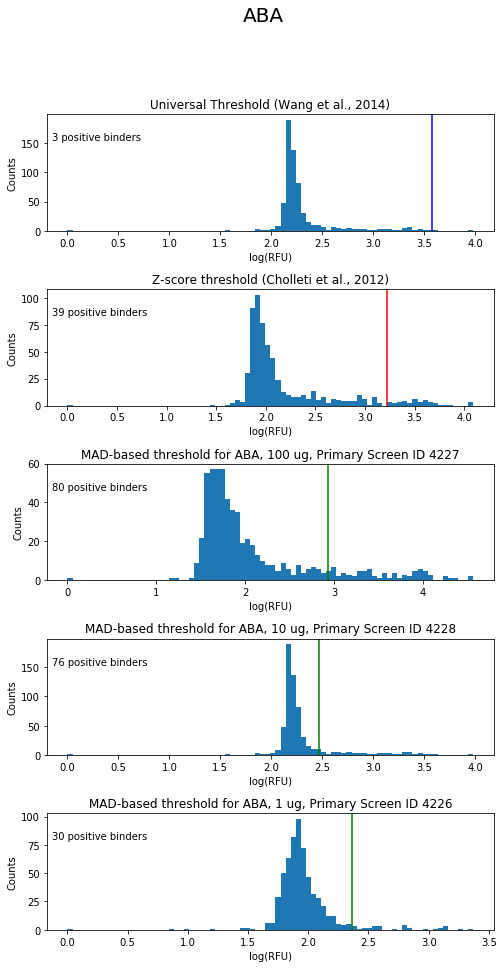

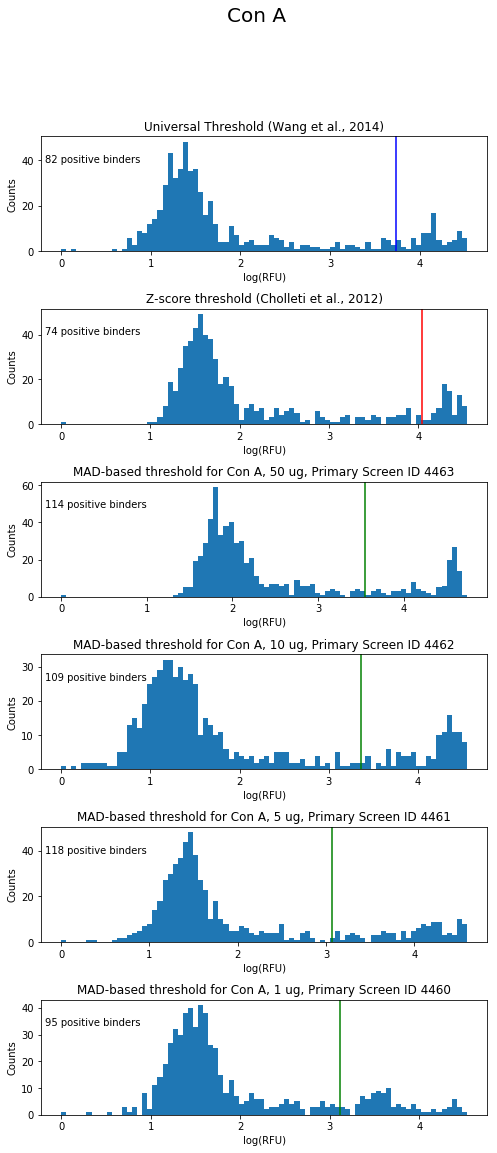

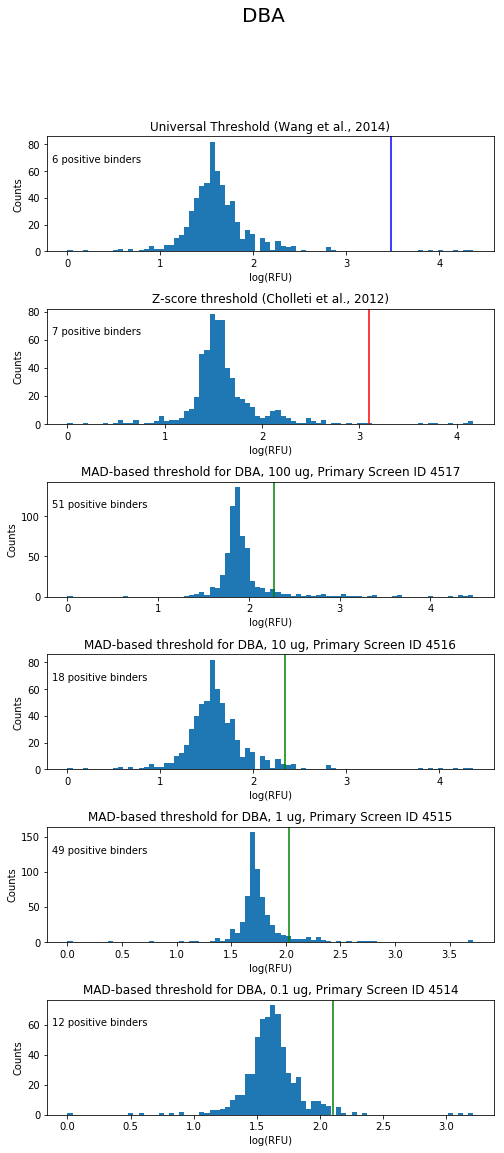

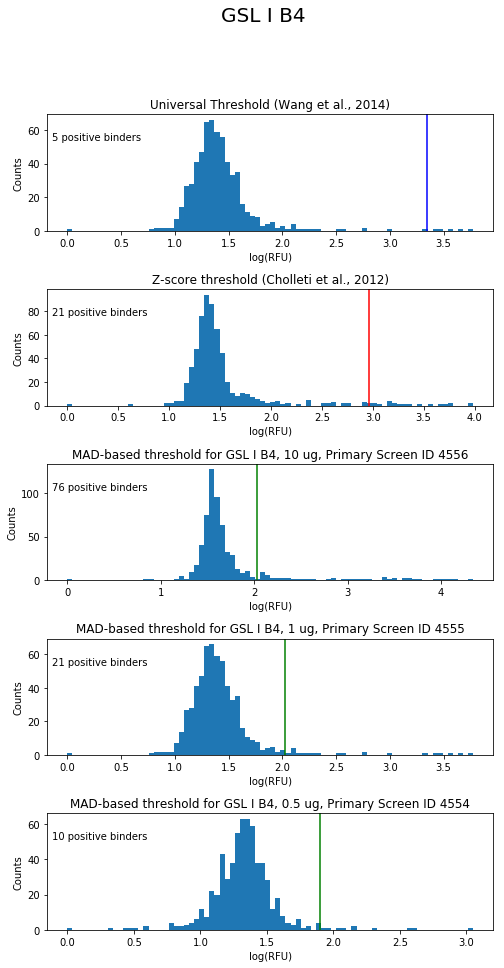

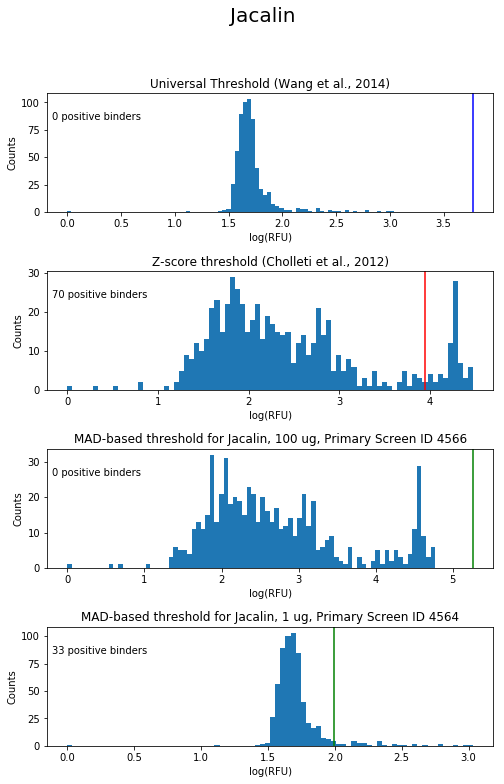

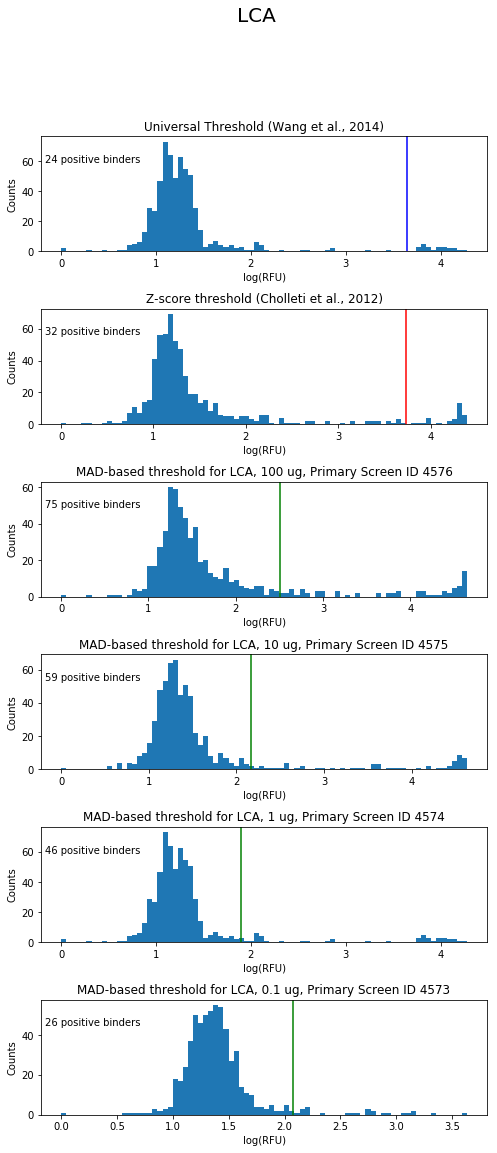

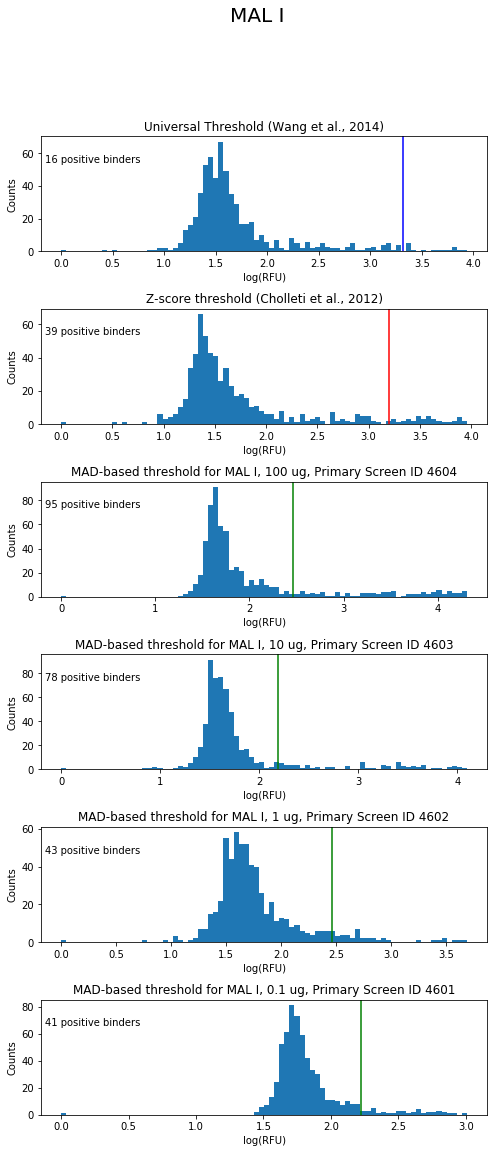

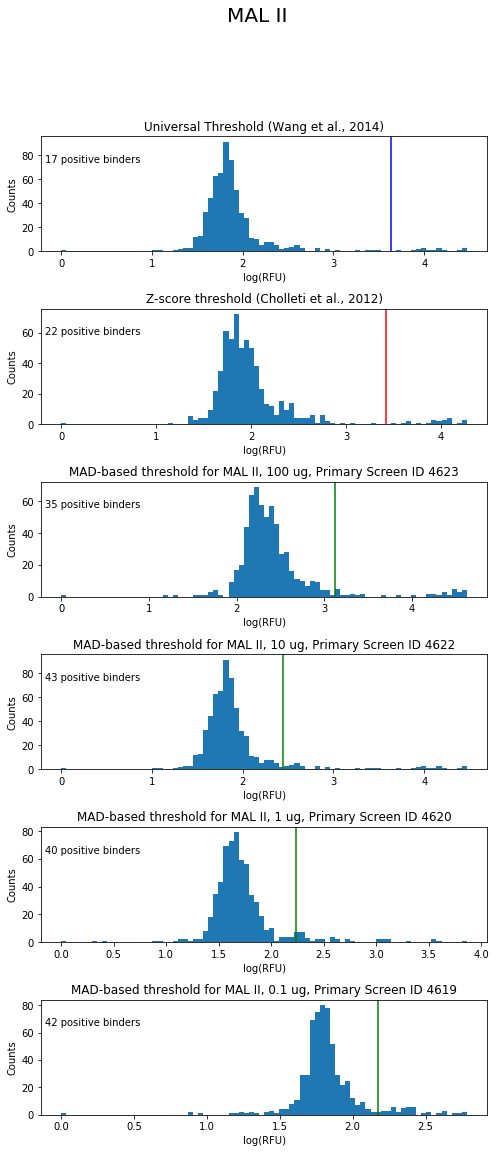

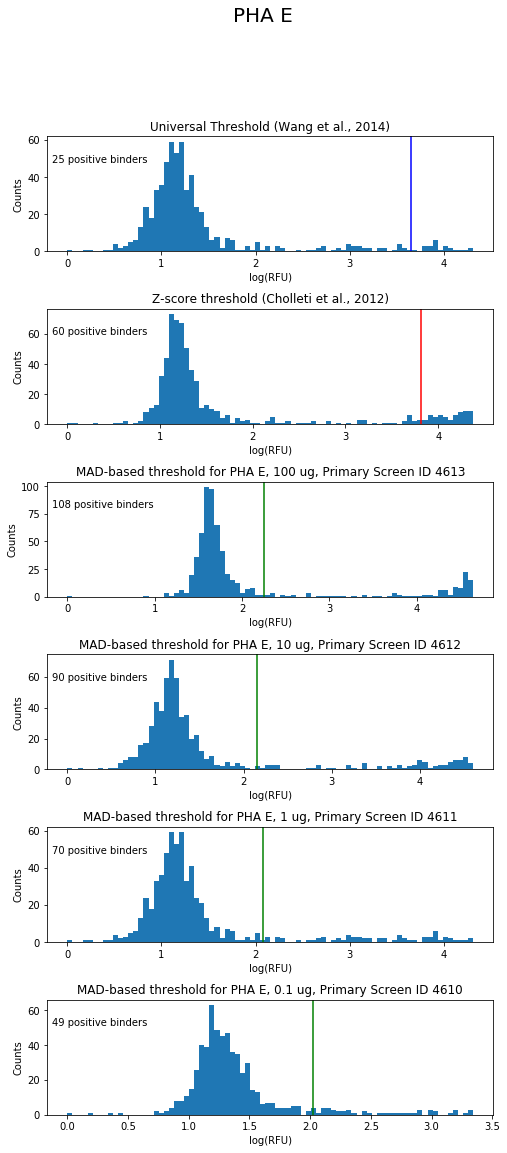

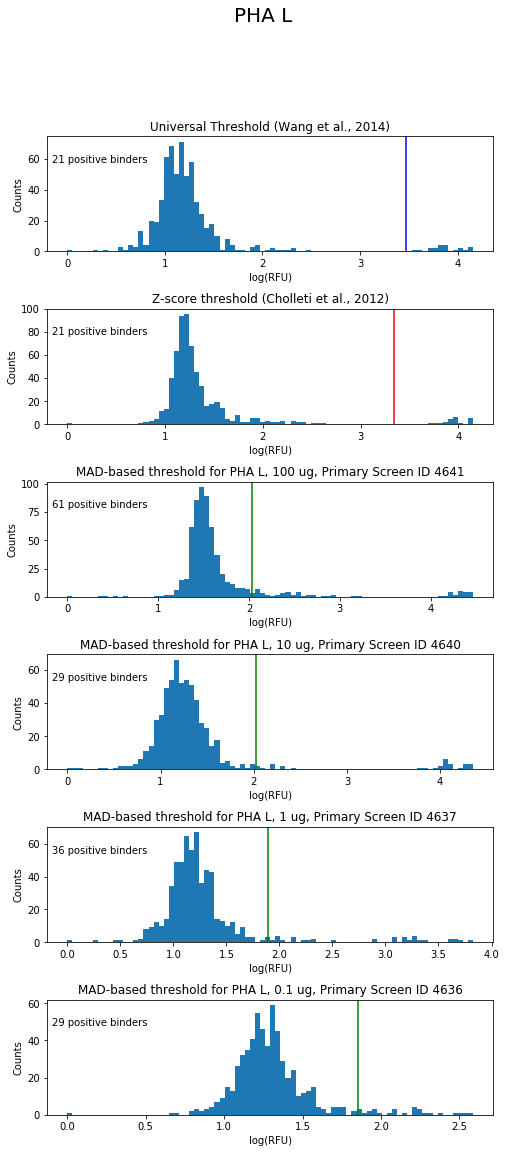

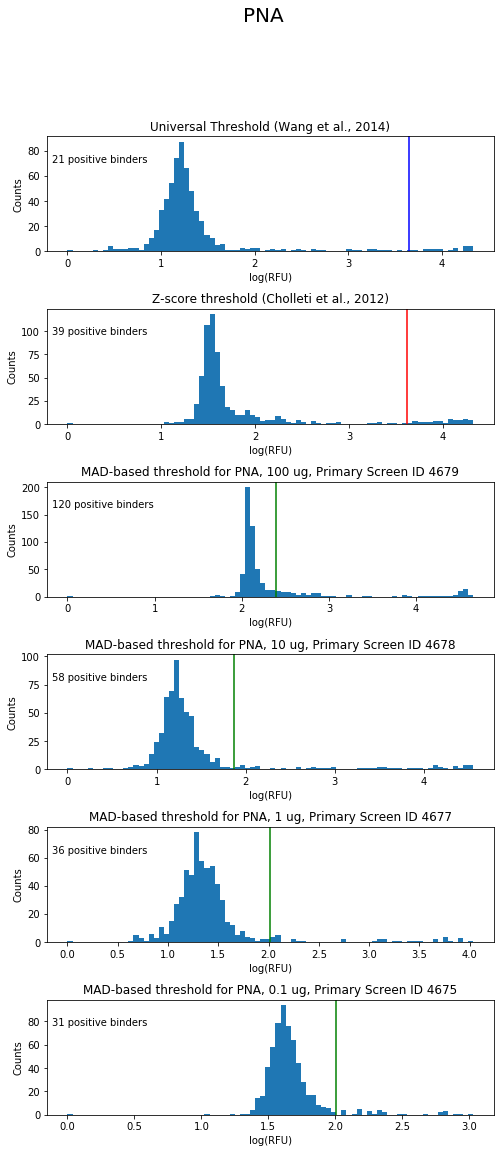

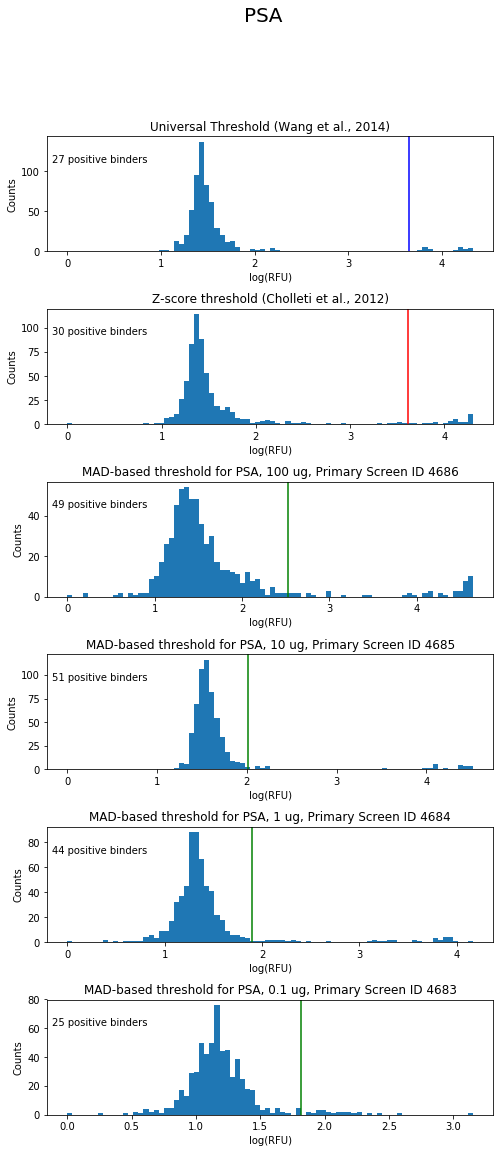

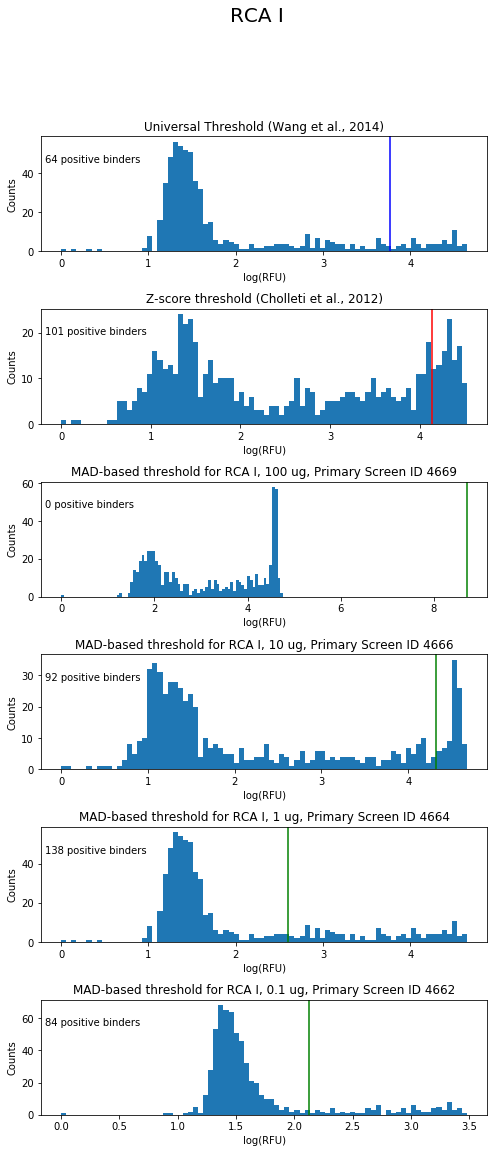

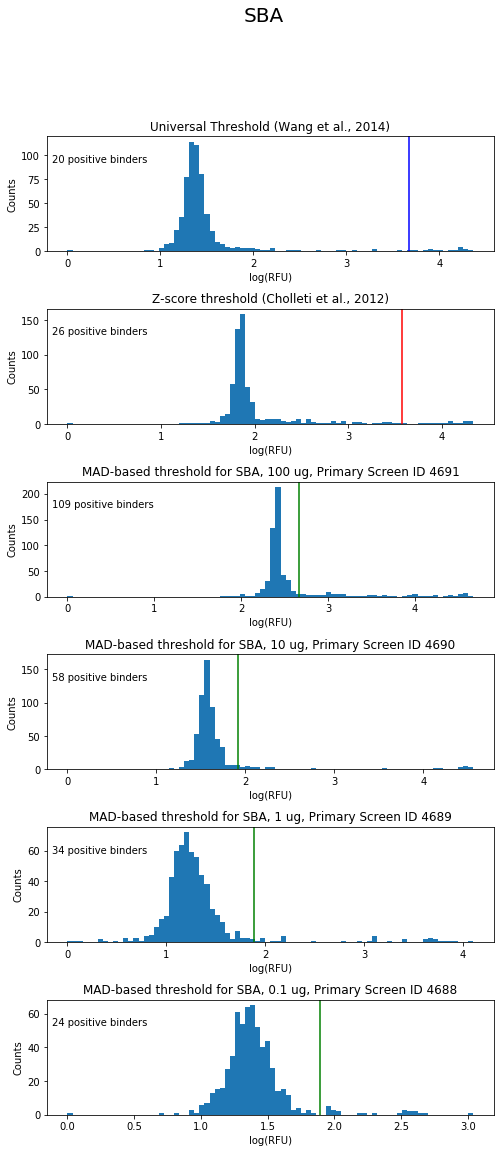

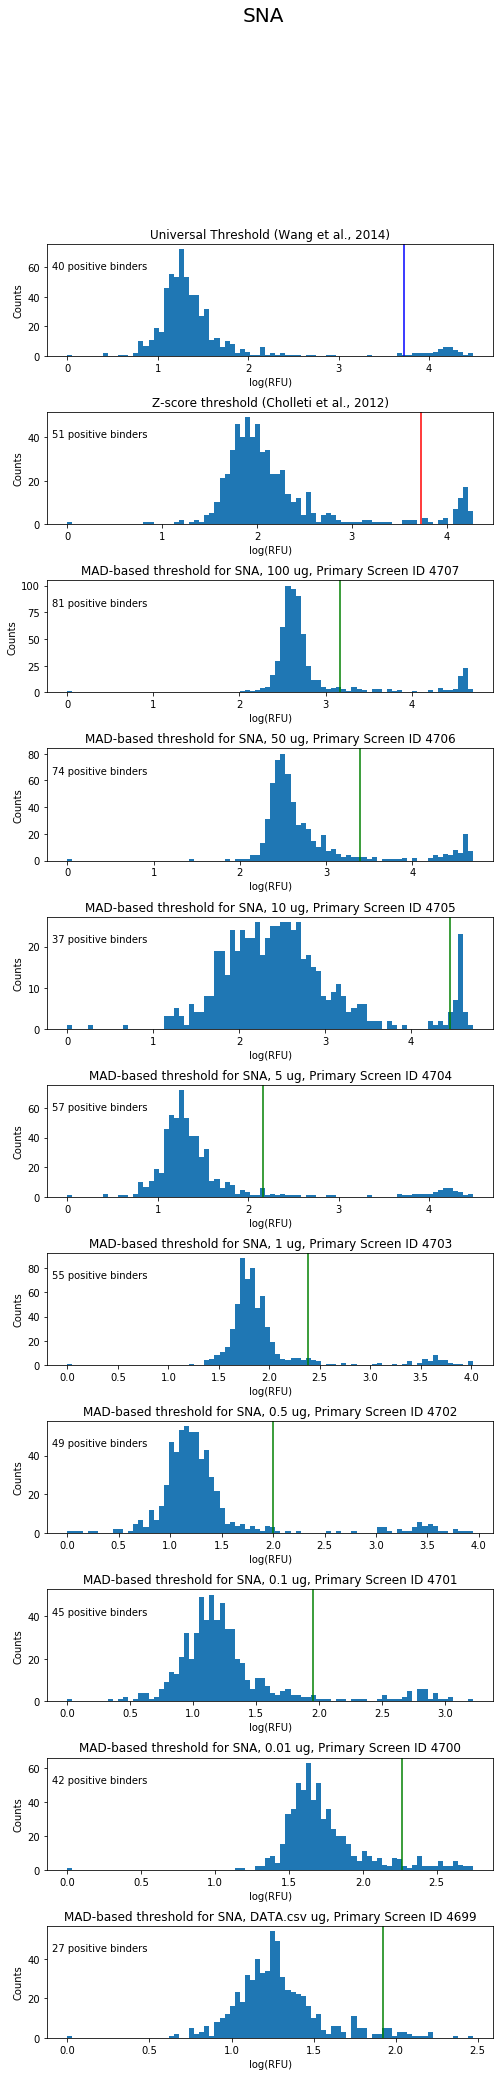

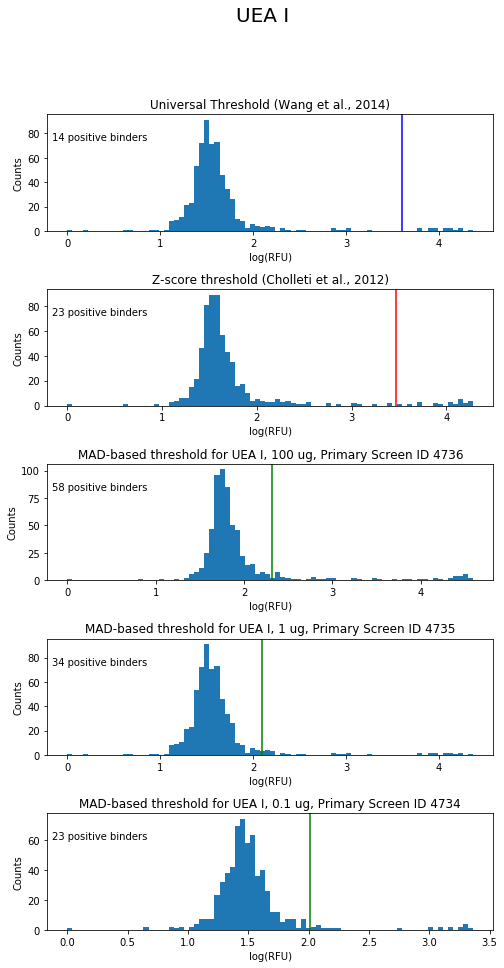

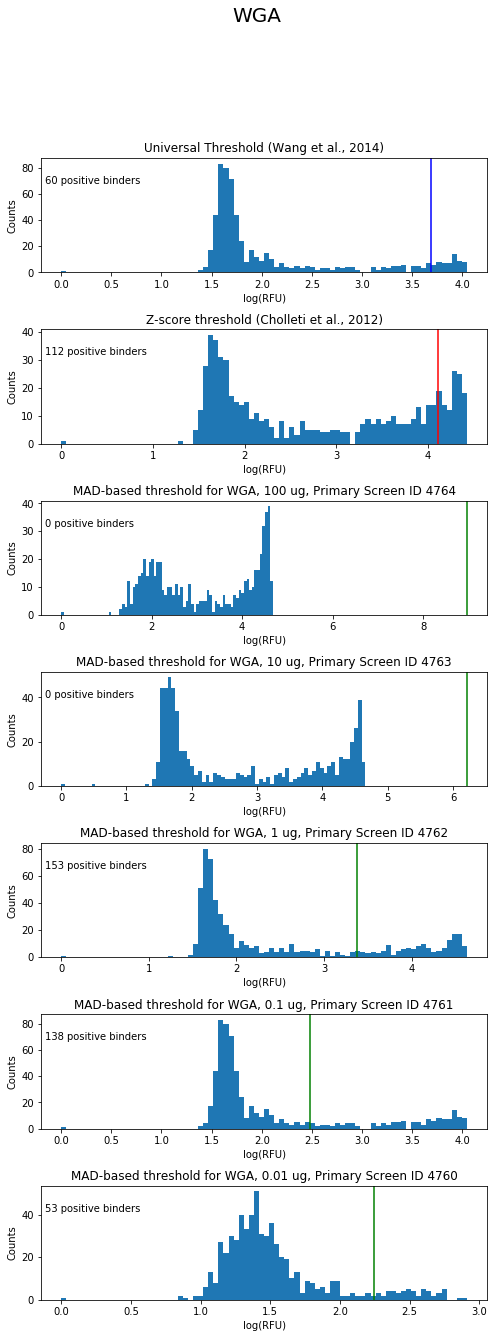

In [14]:
def calculate_universal_threshold(file_list):
    '''Calculates positive binding glycans using the universal threshold outlined by Wang et al. (2014)
    
    Glycan data files in input files list must be sorted by concentration, highest concentration first.
    
    Args:
        file_list (list): A list of file locations for csv files containing binding data.
            CSV files must have a column labelled 'RFU', containing raw RFU values.
    Returns:
        Raw RFU Threshold for calling a positive binder (float)
        Array of boolean values to indicate positive binders (np.array)
        Mean RFU values across all valid arrays (np.array)
    '''
    data = [pd.read_csv(f) for f in file_list]
    rfu_array = np.array([list(x['RFU']) for x in data])
    max_rfu = np.max([list(x['RFU']) for x in data])
    linear_range = np.array([0.2, 0.8]) * max_rfu
    max_rfu_per_array = np.max([list(x['RFU']) for x in data], axis=1)
    is_valid_array = np.logical_and(max_rfu_per_array < linear_range[1], max_rfu_per_array > linear_range[0])
    if not is_valid_array.any():
        #use lowest concentration
        is_valid_array[-1] = True
    mean_values = np.mean(rfu_array[is_valid_array], axis=0)
    is_binder = mean_values > max_rfu * 0.1
    return max_rfu * 0.1, is_binder, mean_values

def calculate_z_score_threshold(file_list):
    '''Calculates positive binding glycans using the z-score tehcnique outlined by Cholleti et al. (2012)
    
    Glycan data files in input files list must be sorted by concentration, highest concentration first.
    
    Args:
        file_list (list): A list of file locations for csv files containing binding data.
            CSV files must have a column labelled 'RFU', containing raw RFU values.
    Returns:
        Raw RFU Threshold for calling a positive binder (float)
        Mean RFU values across all valid arrays (np.array)
    '''
    p_threshold = 0.15
    data = [pd.read_csv(f) for f in file_list]
    rfu_array = np.array([list(x['RFU']) for x in data])
    mean_rfu_values = np.mean(rfu_array, axis=0)
    std_dev = np.std(mean_rfu_values)
    mean_ = np.mean(mean_rfu_values)
    z_threshold = stats.norm.ppf(1 - p_threshold)
    rfu_threshold = z_threshold * std_dev + mean_
    return rfu_threshold, mean_rfu_values



def mad_based_threshold(file_list, thresh=3.5):
    '''Calculates threshold using Median Absolute Deviation.
    
    Args:
        file_list (list): A list of file locations for csv files containing binding data.
            CSV files must have a column labelled 'RFU', containing raw RFU values.
    Returns:
        Log RFU Threshold for calling a positive binder (float)
        Log mean RFU values across all arrays (np.array)
    '''
    data = [pd.read_csv(f) for f in file_list]
    rfu_array = np.array([list(x['RFU']) for x in data])
    points = _log_rfu_values(np.mean(rfu_array, axis=0))
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    signed_diff = np.sum((points - median), axis=-1)
    modified_z_score = 0.6745 * signed_diff / med_abs_deviation
    signed_diff_threshold = thresh * med_abs_deviation / 0.6745 + median
    return signed_diff_threshold, points


pp = PdfPages('threshold_comparison.pdf')


for key, file_list in csv_file_groups.items():
    threshold, binders, mean_rfu = calculate_universal_threshold([os.path.join('./Data/CFG_Data_Files/CFG_CSV_Data_Files/', x) for x in file_list])
    z_score_threshold, mean_z_rfu = calculate_z_score_threshold([os.path.join('./Data/CFG_Data_Files/CFG_CSV_Data_Files/', x) for x in file_list])
    mad_thresholds = []
    mad_binders = []
    for data_file in file_list:
        mad_threshold, mad_rfu = mad_based_threshold([os.path.join('./Data/CFG_Data_Files/CFG_CSV_Data_Files/', data_file)])
        mad_thresholds.append(mad_threshold)
        mad_binders.append(mad_rfu)
    print(f"{key}. RFU threshold of {threshold:.2f}. {np.sum(binders)} binders.")
    fig, ax = plt.subplots(nrows=2 + len(file_list), ncols=1, figsize=(8,3*(2 + len(file_list))))
    log_mean_rfu = _log_rfu_values(mean_rfu)
    log_mean_z_rfu = _log_rfu_values(mean_z_rfu)
    log_threshold = np.log10(-np.min(mean_rfu) + threshold + 1)
    log_z_threshold = np.log10(-np.min(mean_z_rfu) + z_score_threshold + 1)
    ax[0].set_title("Universal Threshold (Wang et al., 2014)")
    ax[0].hist(log_mean_rfu, bins=80)
    ax[0].axvline(log_threshold, color='blue')
    ax[0].set_xlabel('log(RFU)')
    ax[0].set_ylabel('Counts')
    ax[0].text(0.01, 0.8, f"{np.sum(binders)} positive binders", horizontalalignment='left',
               verticalalignment='center', transform=ax[0].transAxes)
    ax[1].set_title("Z-score threshold (Cholleti et al., 2012)")
    ax[1].hist(log_mean_z_rfu, bins=80)
    ax[1].axvline(log_z_threshold, color='red')
    ax[1].set_xlabel('log(RFU)')
    ax[1].set_ylabel('Counts')
    ax[1].text(0.01, 0.8, f"{np.sum(mean_z_rfu > z_score_threshold)} positive binders", horizontalalignment='left',
               verticalalignment='center', transform=ax[1].transAxes)
    for i in range(len(file_list)):
        ax[2 + i].text(0.01, 0.8, f"{np.sum(mad_binders[i] > mad_thresholds[i])} positive binders", horizontalalignment='left',
                   verticalalignment='center', transform=ax[2+i].transAxes)
        concentration = file_list[i].split('ug')[0].split('-')[-1].split('_')[-1]
        ax[2 + i].set_title(f"MAD-based threshold for {key.replace('_', ' ')}, {concentration} ug, Primary Screen ID {primscreen_dict[file_list[i]]}")
        ax[2 + i].hist(mad_binders[i], bins=80)
        ax[2 + i].axvline(mad_thresholds[i], color='green')
        ax[2 + i].set_xlabel('log(RFU)')
        ax[2 + i].set_ylabel('Counts')
    fig.suptitle(key.replace('_', ' '), fontsize=20)
    fig.subplots_adjust(hspace=0.5)

    pp.savefig(fig)
    
pp.close()